In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [44]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [45]:
df = sns.load_dataset('iris')

In [46]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


What does the distribution of petal lengths look like?


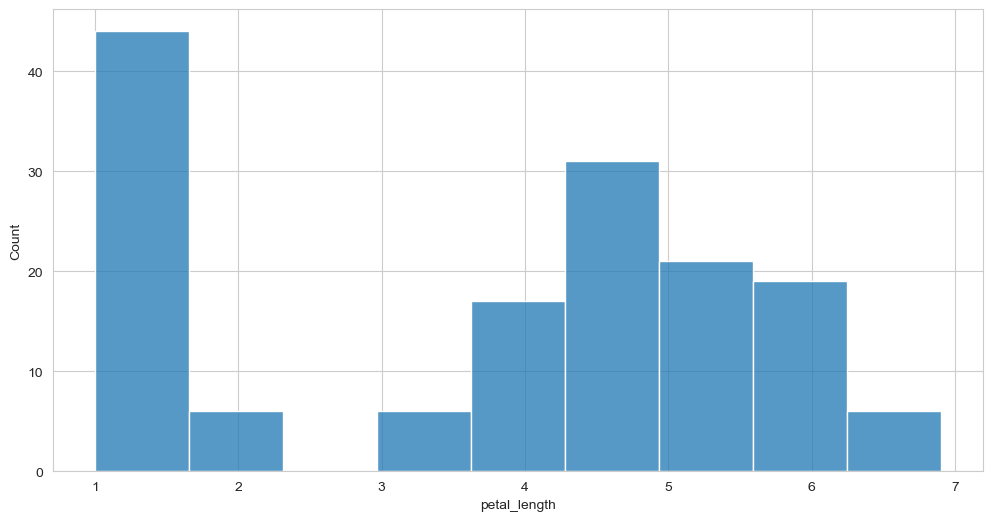

In [47]:
plt.figure(figsize=(12,6))

sns.histplot(df.petal_length)
plt.show()

The distribution has a double bell look with first bell between 1 and 1.75 in length and the second between 4.25 and 5

Is there a relationship between petal length and petal width?


<Figure size 1200x600 with 0 Axes>

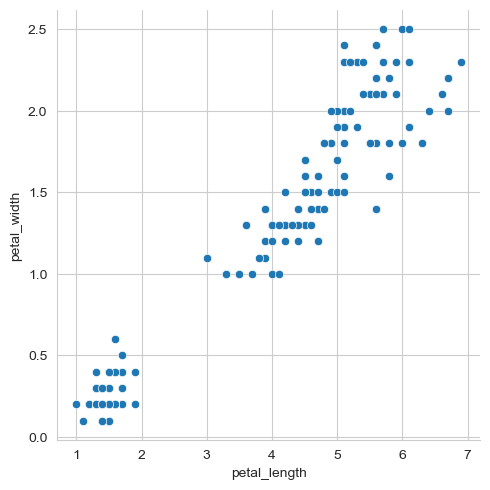

In [48]:
plt.figure(figsize=(12,6))

sns.relplot(data=df, x='petal_length', y='petal_width')
plt.show()

It looks like there is a relationship between length and width. The longer the petal, the wider it is.

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


<Figure size 1200x600 with 0 Axes>

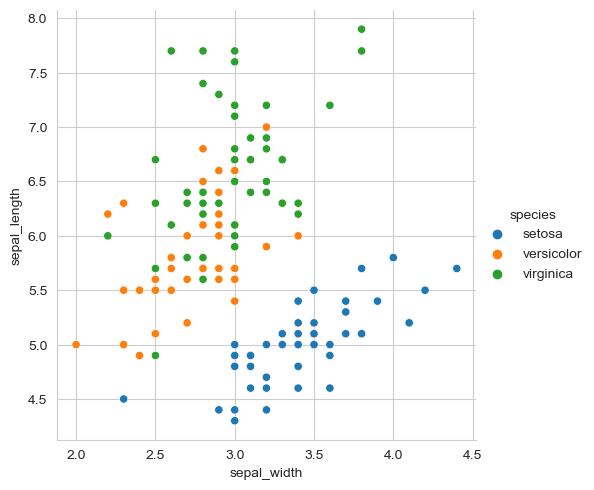

In [49]:
plt.figure(figsize=(12,6))

sns.relplot(data=df, x='sepal_width', y='sepal_length', hue='species')
plt.show()

Only for setosa, based on sepal length and width, because there is minimal overlap.

Which features would be best used to predict species?


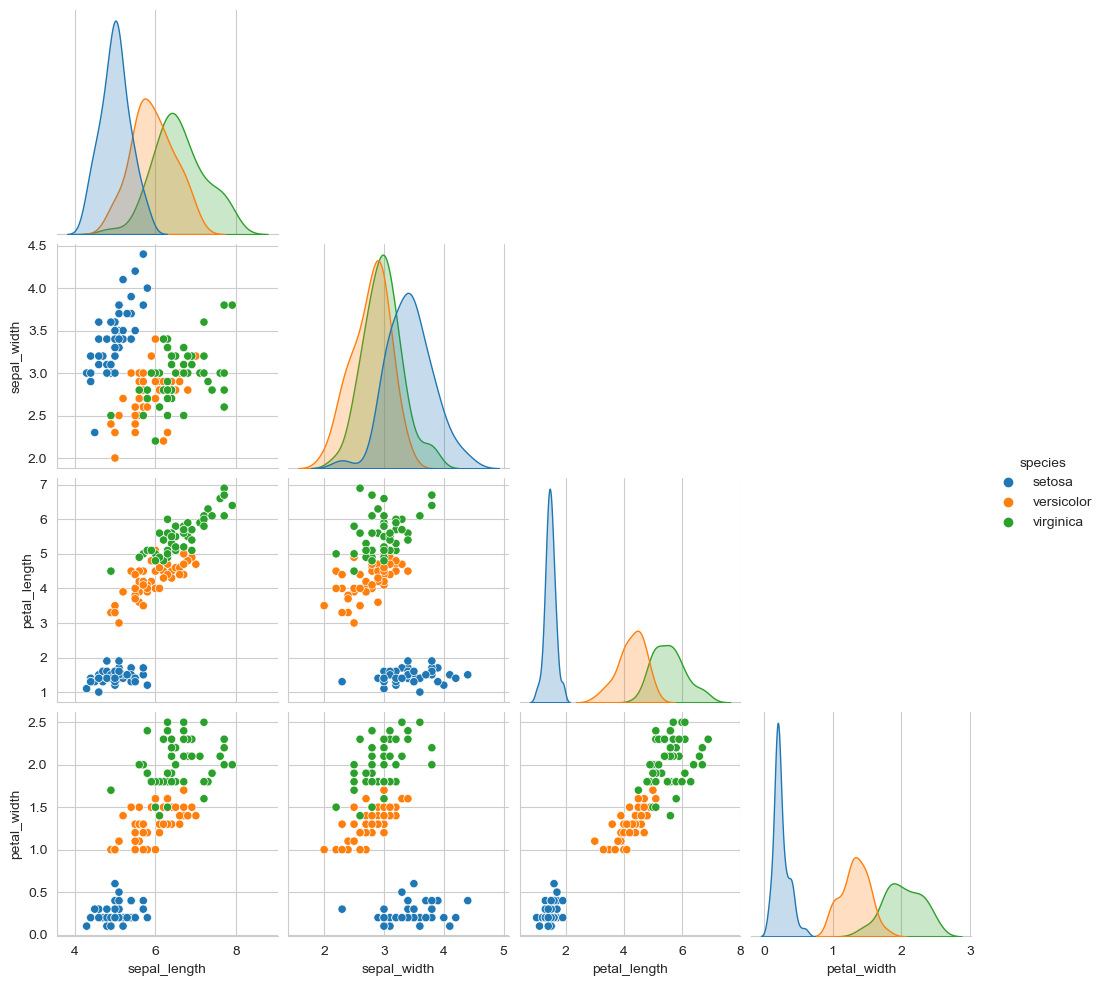

In [50]:
sns.pairplot(data=df,hue='species', corner=True)
plt.show()

* petal length and petal width

In [51]:
df.corr() # to back up with numbers what I'm seeing visually

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?



In [52]:
df_ans = sns.load_dataset('anscombe')
df_ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [53]:
df_ans.groupby('dataset').describe().round(2)

x                                           y                   \
        count mean   std  min  25%  50%   75%   max count mean   std   min   
dataset                                                                      
I        11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  4.26   
II       11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  3.10   
III      11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  5.39   
IV       11.0  9.0  3.32  8.0  8.0  8.0   8.0  19.0  11.0  7.5  2.03  5.25   

                                  
          25%   50%   75%    max  
dataset                           
I        6.32  7.58  8.57  10.84  
II       6.70  8.14  8.95   9.26  
III      6.25  7.11  7.98  12.74  
IV       6.17  7.04  8.19  12.50

I notice there are equal proportions per dataset. Same STD, max and min are similar on X. It looks like it'll be similar graphs

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

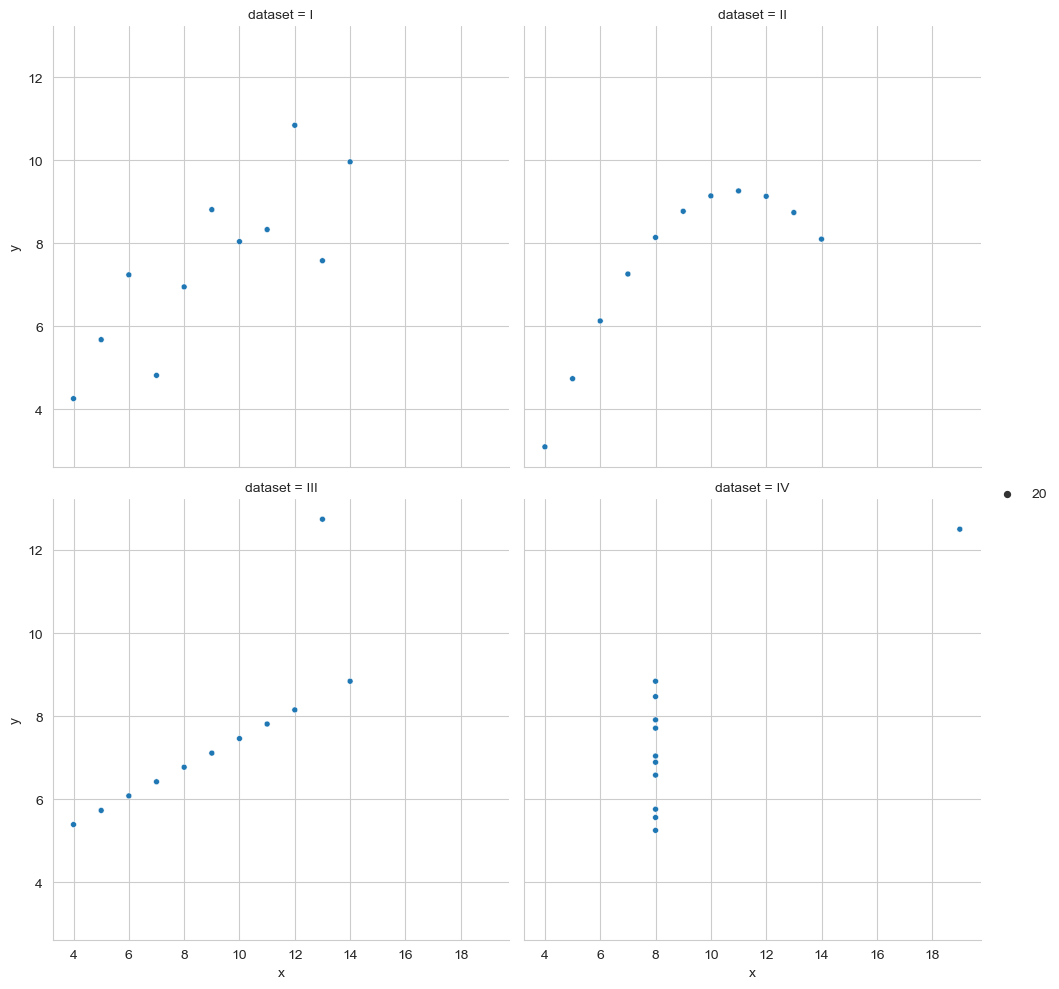

In [54]:
sns.relplot(data=df_ans, x='x', y='y', col='dataset', size=20, col_wrap=2)
plt.show()

Load the InsectSprays dataset from pydataset and read it's documentation.

In [55]:
from pydataset import data

In [56]:
df_ins = data('InsectSprays')

In [57]:
data('InsectSprays', show_doc=True) 

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

Create a boxplot that shows the effectiveness of the different insect sprays.

In [58]:
df_ins = df_ins.rename(columns={'count':'insects'})

In [59]:
df_ins.head()

,insects,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


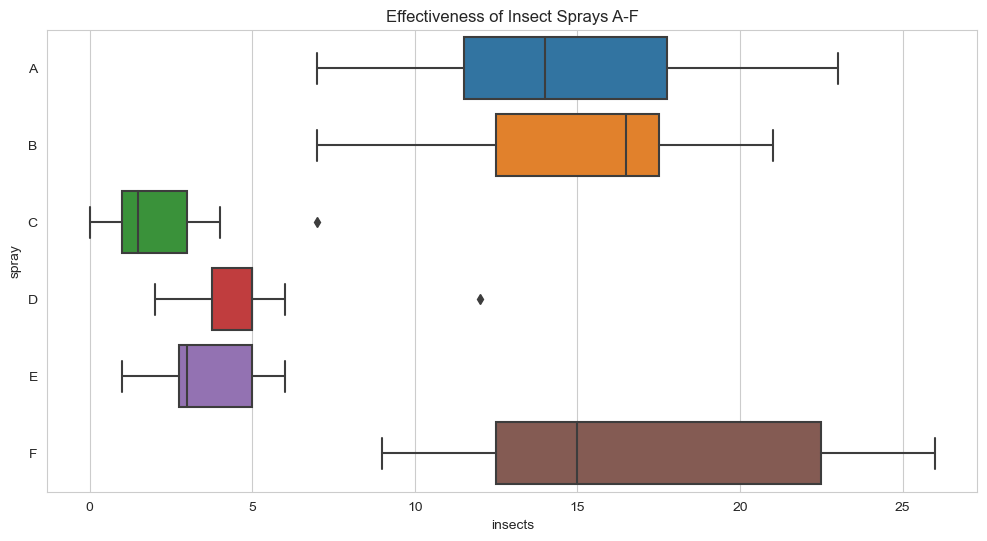

In [60]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df_ins, x='insects', y='spray')

plt.title('Effectiveness of Insect Sprays A-F')

plt.show()

The most effective looks to be Spray 'F'. OR It could be insects present after spraying, in that case it would be Spray 'D'

Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:
* Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
* Does whether or not a province is Catholic influence fertility?
* What measure correlates most strongly with fertility?

In [61]:
df_swiss = data('swiss')

In [62]:
data('swiss', show_doc=True) 

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [63]:
df_swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [64]:
df_swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [65]:
df_swiss['is_catholic']=(df_swiss.Catholic >= 51.00) == True

In [66]:
df_swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


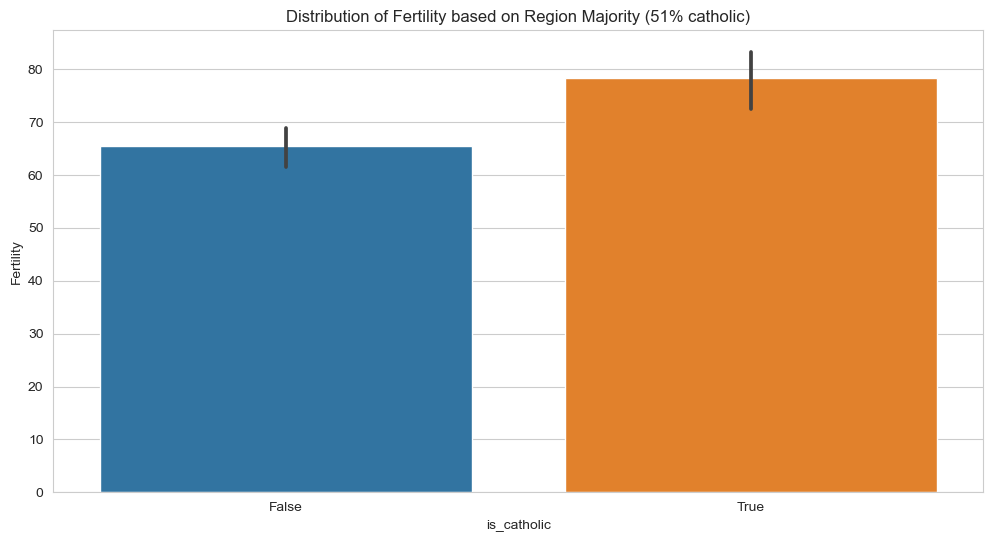

In [67]:
plt.figure(figsize=(12,6))

sns.barplot(data=df_swiss, x='is_catholic', y='Fertility')
plt.title('Distribution of Fertility based on Region Majority (51% catholic)')
plt.show()

* I would say yes, there is a correlation
* the black bar is the error bar!

In [68]:
df_swiss.corr().sort_values(by='Fertility',ascending=False).Fertility

Fertility           1.000000
is_catholic         0.498689
Catholic            0.463685
Infant.Mortality    0.416556
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Name: Fertility, dtype: float64

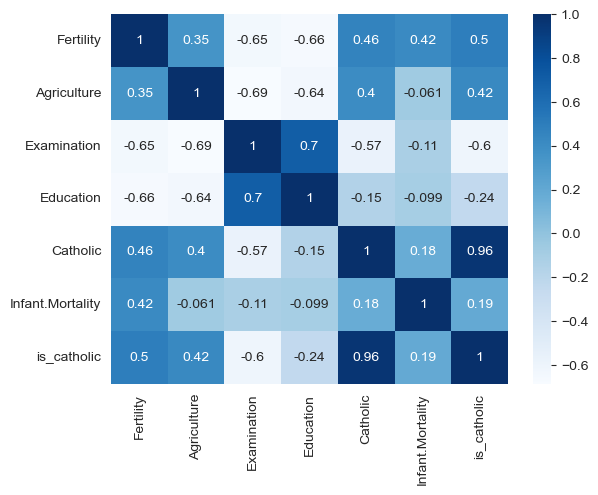

In [69]:
sns.heatmap(df_swiss.corr(), annot=True, cmap='Blues')
plt.show()

Fertility


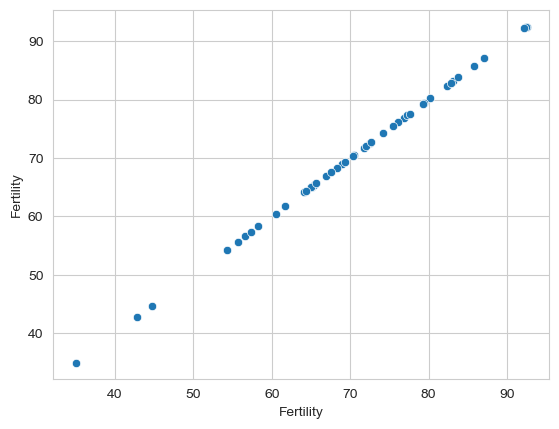

Agriculture


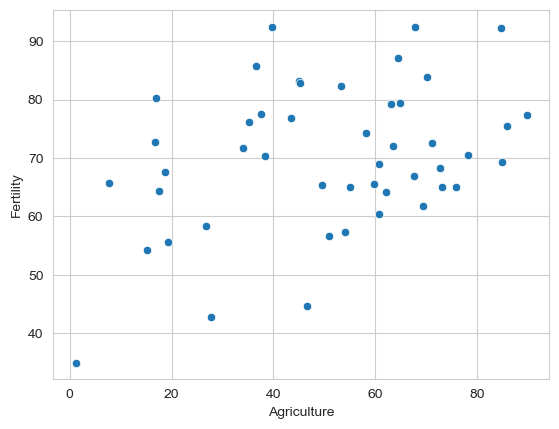

Examination


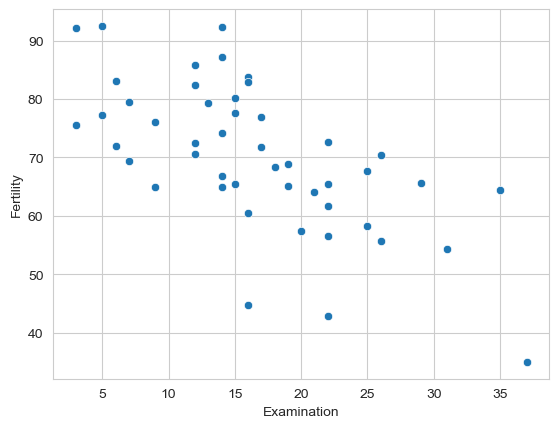

Education


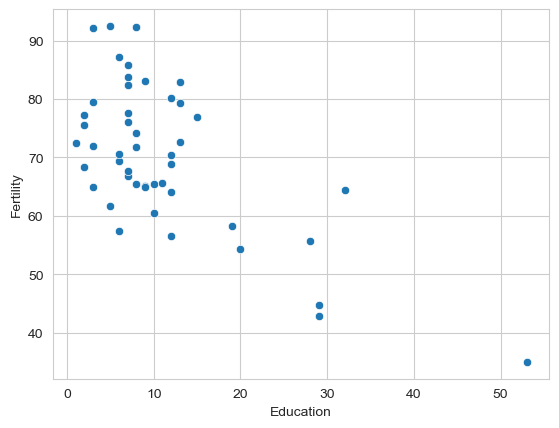

Catholic


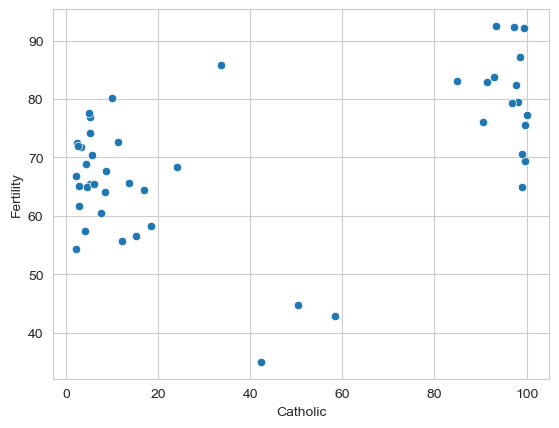

Infant.Mortality


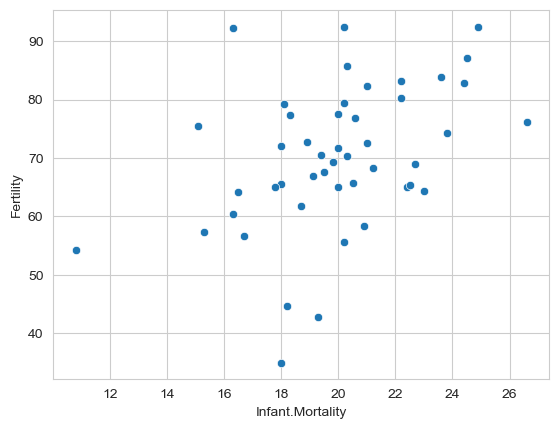

is_catholic


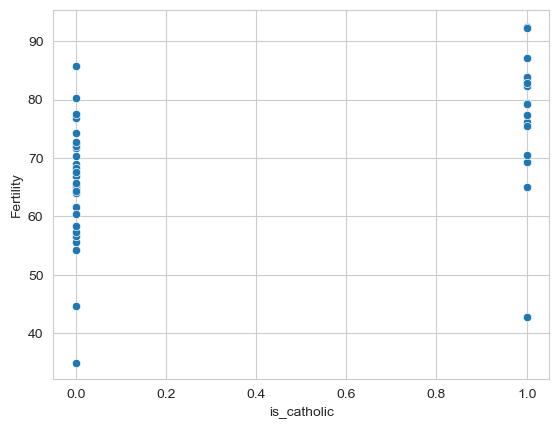

In [70]:
for col in df_swiss:
    print(col)
    sns.scatterplot(data=df_swiss, y='Fertility', x=col)
    plt.show()

It looks like education has the greatest link to fertility, being negative. Examination is also related.

Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.



In [71]:
import env

In [72]:
url_chipotle = env.get_db_url('chipotle')

In [73]:
cp = pd.read_sql('select * from orders', url_chipotle)

In [74]:
cp.item_price = (cp.item_price.str.replace('$','', regex=True)).astype(float)

In [75]:
cp_agg = cp.groupby('item_name').sum('item_price')\
.sort_values(by='quantity', ascending=False).head(4)

cp_agg

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


In [76]:
cp_agg_2 = cp_agg[['item_price']].T
cp_agg_2

item_name,Chicken Bowl,Chicken Burrito,Chips and Guacamole,Steak Burrito
item_price,7342.73,5575.82,2201.04,3851.43


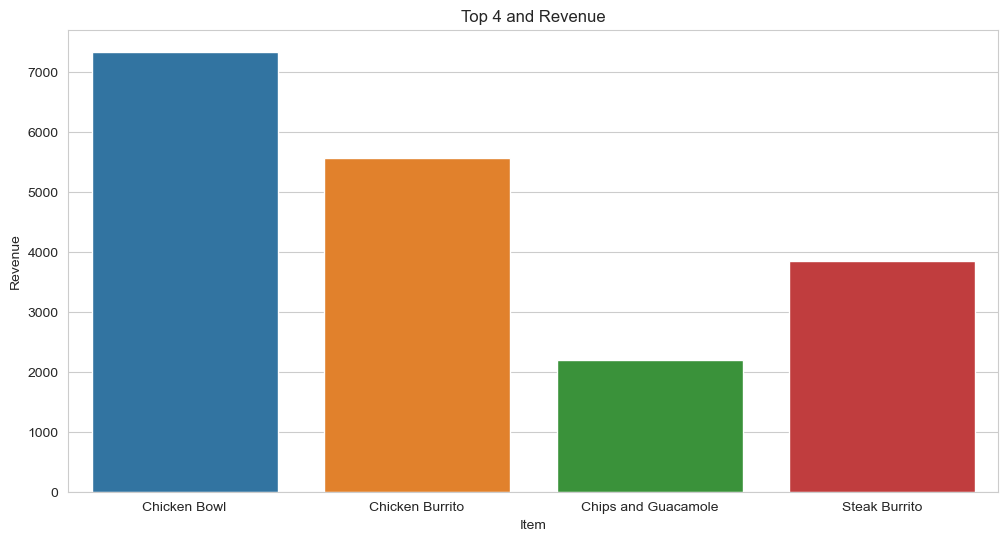

In [77]:
plt.figure(figsize=(12,6))

sns.barplot(data=cp_agg_2)

# label and title
plt.title('Top 4 and Revenue')
plt.xlabel('Item')
plt.ylabel('Revenue')

plt.show()

Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.



In [78]:
df_sleep = data('sleepstudy')

In [79]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [80]:
df_sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [81]:
avg_time_by_days = df_sleep.groupby('Days').mean('Reaction')

In [82]:
avg_time_by_days

,Reaction,Subject
Days,,
0,256.651806,341.277778
1,264.495756,341.277778
2,265.361900,341.277778
3,282.992011,341.277778
4,288.649422,341.277778
5,308.518456,341.277778
6,312.178256,341.277778
7,318.750583,341.277778
8,336.629506,341.277778


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

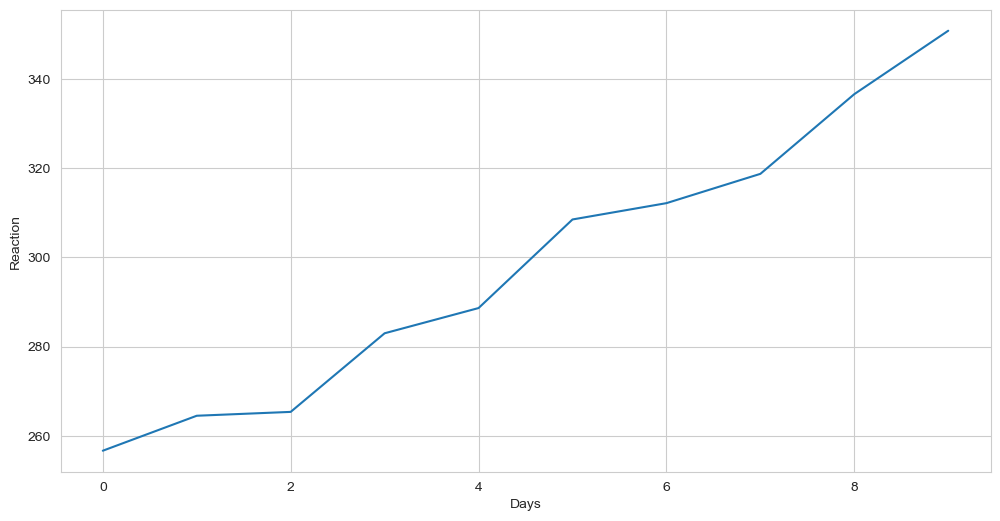

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_time_by_days, x='Days', y='Reaction')

<Figure size 1200x600 with 0 Axes>

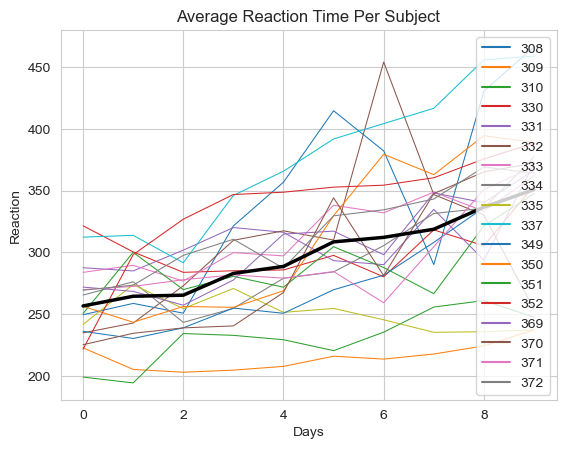

In [84]:
# setting base variables
plt.figure(figsize=(12,6))
figure, ax = plt.subplots()
df_sleep = data('sleepstudy')
avg_time_by_days = df_sleep.groupby('Days').mean('Reaction')
sns.set_style('whitegrid')

#creating lineplots
sns.lineplot(x='Days', y='Reaction', hue='Subject', linewidth=.75, data=df_sleep,\
            estimator=None, palette='tab10', legend='full', ax=ax)

#trend line
sns.lineplot(data=avg_time_by_days, x='Days', y='Reaction', ax=ax, color='black', linewidth=2.5)

# labels and title
plt.title('Average Reaction Time Per Subject')

plt.show()